In [1]:
import data_loader

# Use senator data
arr, reps, bills = data_loader.senate_records()

print(bills[0])

{'congress': '112', 'session': '2', 'majority_requirement': '1/2', 'question': 'On the Motion to Proceed', 'vote_result': 'Motion to Proceed Rejected', 'congress_year': '2012', 'vote_question_text': 'On the Motion to Proceed H.Con.Res. 112', 'vote_title': 'Motion to Proceed to Consider H.Con.Res. 112', 'vote_number': '98', 'vote_document_text': 'A concurrent resolution establishing the budget for the United States Government for fiscal year 2013 and setting forth appropriate budgetary levels for fiscal years 2014 through 2022.', 'vote_result_text': 'Motion to Proceed Rejected (41-58)', 'vote_date': 'May 16, 2012,  04:22 PM'}


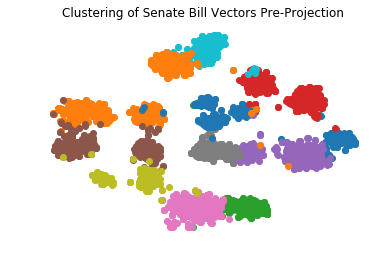

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of Senate Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

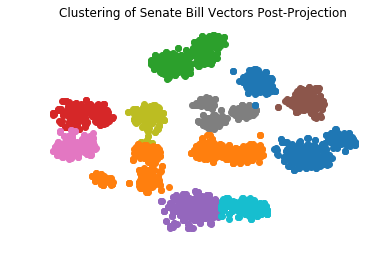

In [3]:
# Do the same after projection (not really that useful)
plt.axis('off')
num_clust = 13
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.title('Clustering of Senate Bill Vectors Post-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

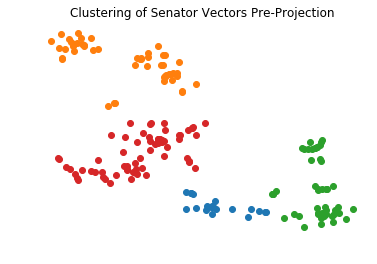

In [4]:
# And for the senators

em = TSNE(n_components=2).fit_transform(arr)
num_clust = 4
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Senator Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

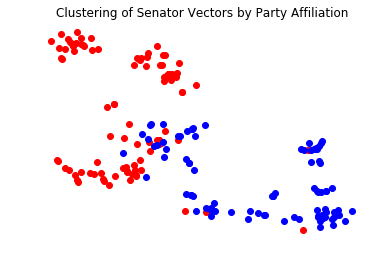

In [ ]:
import numpy as np

# Senators by party with same projection

num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Clustering of Senator Vectors by Party Affiliation')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()

In [ ]:
# Now use house data
arr, reps, bills = data_loader.house_records()

print(arr)

Unable to read 2017_711.xml
Unable to read 2013_2.xml
Unable to read 2011_2.xml
Unable to read 2015_2.xml
Unable to read 2017_2.xml
Unable to read 2019_2.xml
Unable to read 2015_581.xml


[[-1.  1.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [-1. -1.  0. ...  0. -1.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0. -1.  0.]
 [-1.  0.  0. ...  0. -1.  0.]]


In [ ]:
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 18
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of House Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show();

In [ ]:
# House representative vector clustering
em = TSNE(n_components=2).fit_transform(arr)
num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Representative Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

In [ ]:
# House representative vectors by party
num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Representative Vectors by Party')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()